In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("DfTRoadSafety_Accidents_2014.csv")

In [12]:
df.head().T

,0,1,2,3,4
Accident_Index,201401BS70001,201401BS70002,201401BS70003,201401BS70004,201401BS70006
Location_Easting_OSGR,524600,525780,526880,525580,527040
Location_Northing_OSGR,179020,178290,178430,179080,179030
Longitude,-0.206443,-0.189713,-0.173827,-0.192311,-0.171308
Latitude,51.4963,51.4895,51.4905,51.4967,51.4959
Police_Force,1,1,1,1,1
Accident_Severity,3,3,3,3,3
Number_of_Vehicles,2,2,2,1,2
Number_of_Casualties,1,1,1,1,1
Date,09/01/2014,20/01/2014,21/01/2014,15/01/2014,09/01/2014


In [5]:
df.columns.values

array(['Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], dtype=object)

## Check the Date Range 

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


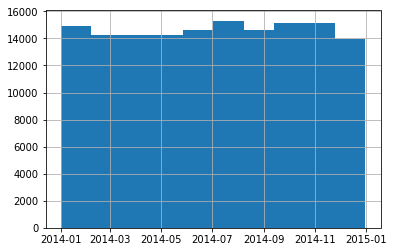

In [8]:
pd.to_datetime(df.Date).hist()

In [6]:
pd.to_datetime(df.Date).min()

Timestamp('2014-01-01 00:00:00')

In [7]:
pd.to_datetime(df.Date).max()

Timestamp('2014-12-31 00:00:00')

## Check for Duplicate Accidents

In [10]:
df.Accident_Index.nunique()

146322

## Check for NULL values

In [11]:
df.apply(lambda x: sum(x.isnull()))

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [16]:
df.nunique()

Accident_Index                                 146322
Location_Easting_OSGR                           92575
Location_Northing_OSGR                          96296
Longitude                                      138878
Latitude                                       137376
Police_Force                                       51
Accident_Severity                                   3
Number_of_Vehicles                                 14
Number_of_Casualties                               26
Date                                              365
Day_of_Week                                         7
Time                                             1439
Local_Authority_(District)                        380
Local_Authority_(Highway)                         207
1st_Road_Class                                      6
1st_Road_Number                                  4384
Road_Type                                           6
Speed_limit                                         6
Junction_Detail             

## As per Introduction tab in Safety Data Guide, the value "-1" is exported for NULL or out of range values

In [14]:
df.replace({-1: None}).apply(lambda x: sum(x.isnull()))

Accident_Index                                     0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

# Observations: 
- Junction Control and 2nd Road Class has too many missing values. So we can drop those fields.
- The cardinality of LSOA_of_Accident_Location is high and also there are more than 6% rows with NULL LSOA_of_Accident_Location values. We can drop this field.
- We can drop 2nd_Road_Number, 1st_Road_Class, 1st_Road_Number as we are already dropping 2nd Road Class field at least for this study. If time permits, we will try to see whether we can derive any value from these features.
- For Road_Surface_Conditions, Special_Conditions_at_Site, and Carriageway_Hazards fields - we can apply the most common value.
- For this study, we are not going to use location or geospatial fields such as Location_Easting_OSGR, Location_Northing_OSGR, Longitude and Latitude as there is not enough time to convert geolocation data into zones or perform reverse geocoding.


# Assumptions:
- Based on data, Police Force denotes the Police Force Jurisdiction which is responsible of multiple Local Authority Districts and Highways. For simplicity sake, we will consider the Police Force field, which is the superset variable of all 3.


# Variables types:
All the features in the above datasheet can be categorized as follows:
### Variables that are excluded from this analysis for reasons explained above:
    - Junction_Control
    - 2nd_Road_Class
    - LSOA_of_Accident_Location
    - 2nd_Road_Number
    - 1st_Road_Class
    - 1st_Road_Number
    - Location_Easting_OSGR
    - Location_Northing_OSGR
    - Longitude
    - Latitude
    - Local_Authority (District)
    - Local_Authority (Highway)
### Ordinal variables: 
    - Accident Severity
### Interval variables:
    - Speed_Limit (as 0 speed limit doesn't make any sense).
### Categorical or Nominal variables:
    - Road_Type
    - Junction_Detail
    - Pedestrian_Crossing-Human_Control
    - Pedestrian_Crossing-Physical_Facilities
    - Light_Conditions
    - Weather_Conditions
    - Road_Surface_Conditions
    - Carriageway_Hazards
    - Urban_or_Rural_Area
### Numerical or Metric or Ratio variables:
    - Number_of_Vehicles
    - Number_of_Casualties
### Time variables:
    - Date
    - Day_of_Week
    - Time
### Target variable:
    - Did_Police_Officer_Attend_Scene_of_Accident

## Data Preprocessing

In [59]:
class preprocessor:
    
    def __init__(self, 
                 columns_to_filter=None, 
                 ordinal_cols=None, 
                 categorical_cols=None, 
                 num_cols=None, 
                 date_cols=None,
                 fillna_withmostcommon=None,
                 time_cols=None):
        self.columns_to_filter = columns_to_filter
        self.ordinal_cols = ordinal_cols
        self.categorical_cols = categorical_cols
        self.num_cols = num_cols
        self.date_cols = date_cols
        self.fillna_withmostcommon = fillna_withmostcommon
        self.time_cols = time_cols
        
    def transform(self, X, y=None):
        
        # Drop columns that are not required
        X_new = X.drop(self.columns_to_filter, axis=1)
        
        # Transform ordinal variables using Label Encoder
        le = LabelEncoder()
        X_new[self.ordinal_cols] = le.fit_transform(X_new[self.ordinal_cols])
        
        # Create dummy variables for each of the categorical variables
        X_new = pd.get_dummies(X_new, columns=self.categorical_cols, dummy_na=True)
        
        # Numerical cols
        X_new[self.num_cols] = X_new[self.num_cols].apply(lambda x:(x.astype(int) - min(x))/(max(x) - min(x)), axis=0)
        
        # Fill NA with most common
        for f in fillna_withmostcommon:
            if f in X_new.columns.values:
                X_new[f] = X_new[f].fillna(X_new[f].value_counts().index[0])
        
        return X_new
        

In [60]:
df.columns.values

array(['Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], dtype=object)

In [61]:
columns_to_filter = ['Junction_Control', '2nd_Road_Class', 'LSOA_of_Accident_Location', \
                    '2nd_Road_Number', '1st_Road_Class', '1st_Road_Number', 'Location_Easting_OSGR', \
                    'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Local_Authority_(District)', \
                    'Local_Authority_(Highway)']

ordinal_cols = ['Accident_Severity']
categorical_cols = ['Road_Type', 'Junction_Detail', 'Pedestrian_Crossing-Human_Control', \
                    'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', \
                    'Road_Surface_Conditions', 'Carriageway_Hazards', 'Urban_or_Rural_Area']

num_cols = ['Number_of_Vehicles', 'Number_of_Casualties']
date_cols = ['Date']
fillna_withmostcommon = ['Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards']

In [62]:
p = preprocessor(columns_to_filter, ordinal_cols, categorical_cols, num_cols, date_cols, fillna_withmostcommon)
transformed_df = p.transform(df)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
transformed_df['Date'] = pd.to_datetime(transformed_df['Date'])

In [ ]:
### Now let's fill NA values with most common

## Let's do Data exploration. I will skip this as you have done pretty good analysis.

In [64]:
transformed_df.columns.values

array(['Accident_Index', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Day_of_Week', 'Time', 'Speed_limit', 'Special_Conditions_at_Site',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Road_Type_1.0',
       'Road_Type_2.0', 'Road_Type_3.0', 'Road_Type_6.0', 'Road_Type_7.0',
       'Road_Type_9.0', 'Road_Type_nan', 'Junction_Detail_0.0',
       'Junction_Detail_1.0', 'Junction_Detail_2.0',
       'Junction_Detail_3.0', 'Junction_Detail_5.0',
       'Junction_Detail_6.0', 'Junction_Detail_7.0',
       'Junction_Detail_8.0', 'Junction_Detail_9.0',
       'Junction_Detail_nan', 'Pedestrian_Crossing-Human_Control_0.0',
       'Pedestrian_Crossing-Human_Control_1.0',
       'Pedestrian_Crossing-Human_Control_2.0',
       'Pedestrian_Crossing-Human_Control_nan',
       'Pedestrian_Crossing-Physical_Facilities_0.0',
       'Pedestrian_Crossing-Physical_Facilities_1.0',
       'Pedestrian_Crossing-Physical_Facilities_4.0',
   

In [81]:
columns_to_not_include = ['Police_Force', 'Accident_Index', 'Date', 'Day_of_Week', 'Time', 'Did_Police_Officer_Attend_Scene_of_Accident']
predictors = [c for c in transformed_df.columns.values if c not in columns_to_not_include]

transformed_df['Did_Police_Officer_Attend_Scene_of_Accident'] = transformed_df['Did_Police_Officer_Attend_Scene_of_Accident'].replace({2:0.0, 1:1.0})

## Heatmap of Ordinal, Numerical, and Target variables

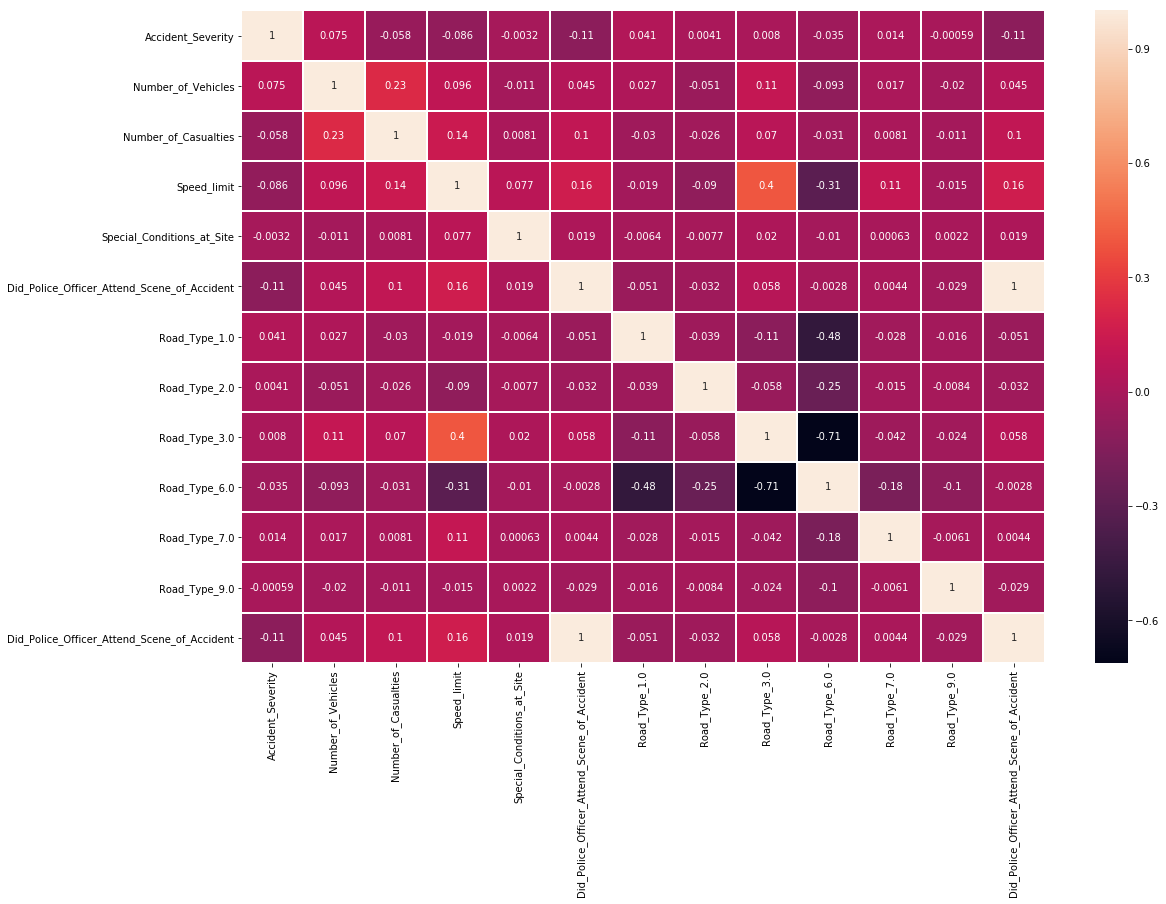

In [74]:
features = ['Accident_Severity','Number_of_Vehicles', 'Number_of_Casualties','Speed_limit', 'Special_Conditions_at_Site',\
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Road_Type_1.0',\
       'Road_Type_2.0', 'Road_Type_3.0', 'Road_Type_6.0', 'Road_Type_7.0',\
       'Road_Type_9.0', 'Did_Police_Officer_Attend_Scene_of_Accident']
corrmat = transformed_df[features].corr()
f,x = plt.subplots(figsize=(18,12))
sns.heatmap(corrmat, linecolor='white', lw=1, annot=True)

## I will skip most of the EDA as you have done a good job.

## The next thing I would do is to study Numerical variables

# After that, I study whether there is a linear relationship observed between dependent variables and outcome.

# Modeling